# Introduction

This project sets out to compare and analyze the success of the top performing books as movies.

The movie is never as good as the book was right? That is the very question we are seeking to find out with this project.


*This project will attempt to answer the following questions:* 

- Does publishing more books equate to more and better movies?
- Does the filming location matter for better ratings?
- Are older or newer published books more popular as movies?

## Methodology

Book data was taken from the [10000 Good Books DataSet](https://www.kaggle.com/datasets/zygmunt/goodbooks-10k?select=books.csv) and the Movie data was taken from the [Top 100 popular movies from 2003 to 2022 (iMDB)](https://www.kaggle.com/datasets/georgescutelnicu/top-100-popular-movies-from-2003-to-2022-imdb).


## Results
 
### 1. Import Libraries
    

In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import requests

### 2. Import and clean the Book and Movie Data

In [2]:
top_books = pd.read_csv("books.csv")

top_books.dropna()

top_books.columns

Index(['id', 'book_id', 'best_book_id', 'work_id', 'books_count', 'isbn',
       'isbn13', 'authors', 'original_publication_year', 'original_title',
       'title', 'language_code', 'average_rating', 'ratings_count',
       'work_ratings_count', 'work_text_reviews_count', 'ratings_1',
       'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5', 'image_url',
       'small_image_url'],
      dtype='object')

### 3. Explore the Data

#### Question 1: Does publishing more books equate to more and better movies?

In [3]:
top_books.drop(['id', 'book_id', 'best_book_id', 'work_id', 'isbn', ], axis=1, inplace=True)

### Findings

* The average number of passengers had already began to decline starting in 2013 but took a steeper drop from 1.56 people in 2019 to 1.41 people in 2020.
* Rides did recover a bit in 2021 but went back down in 2022.
* The pandemic had an impact on the average rider count but not as significant as hypothesized at the outset.

In [4]:
top_books.sort_values('average_rating', ascending=False)

,books_count,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
3627,14,9.780741e+12,Bill Watterson,2005.0,The Complete Calvin and Hobbes,The Complete Calvin and Hobbes,eng,4.82,28900,29968,861,120,154,693,3117,25884,https://images.gr-assets.com/books/1473064526m...,https://images.gr-assets.com/books/1473064526s...
3274,11,9.780440e+12,"J.K. Rowling, Mary GrandPré",2003.0,NaN,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",eng,4.77,33220,33424,156,317,233,978,3686,28210,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
861,34,9.780765e+12,Brandon Sanderson,2014.0,Words of Radiance,"Words of Radiance (The Stormlight Archive, #2)",eng,4.77,73572,108176,7261,154,404,2653,18272,86693,https://images.gr-assets.com/books/1391535251m...,https://images.gr-assets.com/books/1391535251s...
8853,6,9.780842e+12,Francine Rivers,1993.0,Mark of the Lion Trilogy,Mark of the Lion Trilogy,en-US,4.76,9081,9547,731,27,61,323,1363,7773,https://images.gr-assets.com/books/1349032180m...,https://images.gr-assets.com/books/1349032180s...
7946,96,9.781434e+12,"Anonymous, Lane T. Dennis, Wayne A. Grudem",2002.0,NaN,ESV Study Bible,eng,4.76,8953,10784,262,98,90,367,1152,9077,https://images.gr-assets.com/books/1410151002m...,https://images.gr-assets.com/books/1410151002s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9020,18,9.780061e+12,"Gregory Maguire, Douglas Smith",2001.0,Lost,Lost,eng,2.80,12534,12937,921,1749,3377,4518,2237,1056,https://images.gr-assets.com/books/1407711681m...,https://images.gr-assets.com/books/1407711681s...
4008,57,9.780802e+12,Candace Bushnell,2000.0,Four Blondes,Four Blondes,NaN,2.80,22278,23272,943,3921,5722,7219,3904,2506,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
8006,45,9.781409e+12,Howard Jacobson,2010.0,The Finkler Question,The Finkler Question,eng,2.76,9627,12062,1913,1887,3046,3909,2466,754,https://images.gr-assets.com/books/1319018978m...,https://images.gr-assets.com/books/1319018978s...
3549,63,9.780317e+12,Alice Sebold,2007.0,The Almost Moon,The Almost Moon,eng,2.67,28299,31183,5223,5670,8233,9978,5312,1990,https://images.gr-assets.com/books/1310421579m...,https://images.gr-assets.com/books/1310421579s...


#### Question 2: Does the filming location matter for better ratings?

In [51]:
top_author = top_books['authors'].value_counts().idxmax()
author_book_count = pd.Series(top_books['authors'].value_counts(), index=top_books['authors'])
author_book_count.drop_duplicates(inplace=True)
author_book_count.sort_values(inplace=True)
author_book_count

authors
George Orwell, Erich Fromm, Celâl Üster     1
Harper Lee                                  2
Khaled Hosseini                             3
John Green                                  4
F. Scott Fitzgerald                         5
J.R.R. Tolkien                              6
Dan Brown                                   7
J.K. Rowling, Mary GrandPré                 8
Suzanne Collins                             9
Douglas Adams                              10
Stephenie Meyer                            11
Veronica Roth                              12
Cassandra Clare                            13
Bill Bryson                                14
Sophie Kinsella                            15
George R.R. Martin                         16
Ken Follett                                17
Dr. Seuss                                  18
C.S. Lewis                                 19
Jeffrey Archer                             20
Orson Scott Card                           21
Rick Riordan              

### Findings

* The number of cash payments in 2019 was 321,343 while the number of credit payments the same year was 851,437
* The number of cash payments in 2020 was 321,204 while the number of credit payments the same year was 777,336
* In 2019, roughly 73% of all payments were made with credit card. In 2020 that number decreased to roughly %71.

#### Question 3: Are older or newer published books more popular as movies?

<Axes: ylabel='Frequency'>

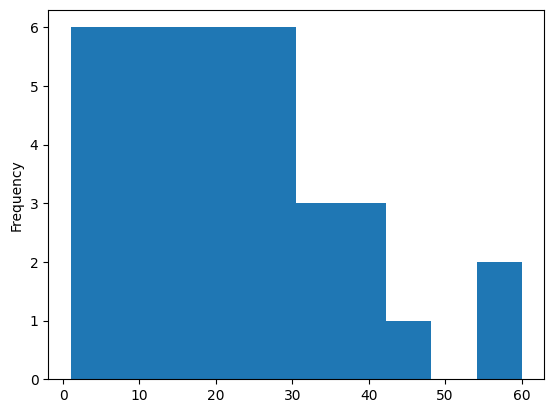

In [72]:
author_book_count.plot(kind='hist')

In [74]:
top_movies = pd.read_csv("movies.csv")

top_movies.dropna()

top_movies.rename(columns={"Title": "title"}, inplace=True)
top_movies.columns

Index(['title', 'Rating', 'Year', 'Month', 'Certificate', 'Runtime',
       'Directors', 'Stars', 'Genre', 'Filming_location', 'Budget', 'Income',
       'Country_of_origin'],
      dtype='object')

In [150]:
both_lists = pd.merge(top_books, top_movies, on="title")
both_lists.columns

Index(['books_count', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url', 'Rating', 'Year', 'Month',
       'Certificate', 'Runtime', 'Directors', 'Stars', 'Genre',
       'Filming_location', 'Budget', 'Income', 'Country_of_origin'],
      dtype='object')

<Axes: xlabel='average_rating', ylabel='Filming_location'>

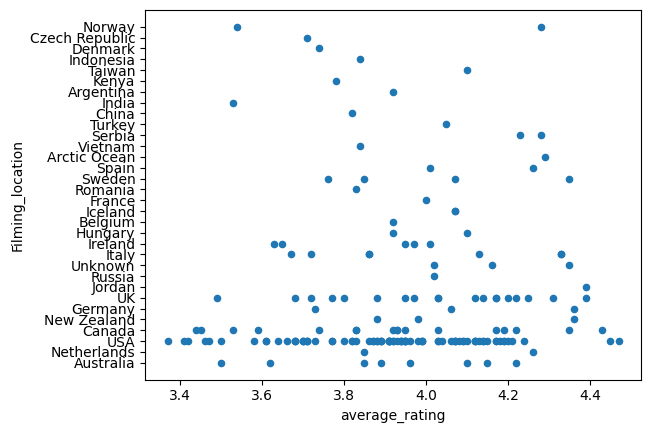

In [173]:
both_lists.plot.scatter(x='average_rating', y='Filming_location')

<Axes: xlabel='Rating', ylabel='original_publication_year'>

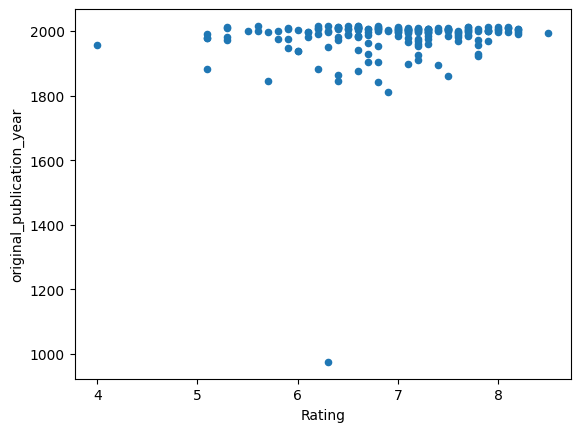

In [177]:
both_lists.plot.scatter(x='Rating', y='original_publication_year')